In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data01.csv")

# Calculate the missingness for each column
missing_data = df.isnull().mean() * 100

print("Missingness of data in the dataset (in percentage):\n", missing_data)


Missingness of data in the dataset (in percentage):
 group                        0.000000
ID                           0.000000
outcome                      0.084962
age                          0.000000
gendera                      0.000000
BMI                         18.266780
hypertensive                 0.000000
atrialfibrillation           0.000000
CHD with no MI               0.000000
diabetes                     0.000000
deficiencyanemias            0.000000
depression                   0.000000
Hyperlipemia                 0.000000
Renal failure                0.000000
COPD                         0.000000
heart rate                   1.104503
Respiratory rate             1.104503
temperature                  1.614274
SP O2                        1.104503
Urine output                 3.058624
hematocrit                   0.000000
RBC                          0.000000
MCH                          0.000000
MCHC                         0.000000
MCV                          0.0000

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data01.csv")

# Calculate the total number of cells in the dataset
total_cells = df.size

# Count the total number of missing values in the dataset
total_missing_values = df.isnull().sum().sum()

# Calculate the total missingness of the dataset
total_missingness = (total_missing_values / total_cells) * 100

print("Total missingness of the dataset (in percentage):", total_missingness)


Total missingness of the dataset (in percentage): 3.213553900744665


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models

# Step 1: Data Preprocessing
data = pd.read_csv('data01.csv')

# Split the dataset into complete and incomplete rows
complete_data = data.dropna()
incomplete_data = data[data.isnull().any(axis=1)]

# Step 2: Model Training
# Use complete data for training
complete_data_imputed = complete_data.copy()

# Define the number of features
num_features = len(complete_data_imputed.columns)

# Generator Model with Increased Complexity
generator = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(num_features,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_features)  # Output layer
])

# Discriminator Model
discriminator = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(num_features,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compile the discriminator model
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Compile the generator model
generator.compile(optimizer='adam', loss='mse')

# Combined Model (Generator + Discriminator)
discriminator.trainable = False  # Freeze discriminator's weights during generator training
combined_model = models.Sequential([generator, discriminator])

# Compile the combined model
combined_model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the generator model on complete data
epochs = 5
batch_size = 32
for epoch in range(epochs):
    # Train discriminator
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))
    real_data_batch = complete_data_imputed.sample(batch_size)
    generated_data_batch = generator.predict(real_data_batch)
    d_loss_real = discriminator.train_on_batch(real_data_batch, real_labels)
    d_loss_fake = discriminator.train_on_batch(generated_data_batch, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train generator (via combined model)
    noise = np.random.normal(0, 1, (batch_size, num_features))
    g_loss = combined_model.train_on_batch(noise, real_labels)

    # Print progress
    print(f"Epoch {epoch+1}, D Loss: {d_loss[0]}, G Loss: {g_loss}")

# Step 3: Imputation
# Generate imputations for missing values in incomplete rows
for index, row in incomplete_data.iterrows():
    missing_features = row.isnull()
    if missing_features.any():
        filled_features = row.copy()
        # Iterate through missing values and fill them
        for feature, is_missing in missing_features.items():
            if is_missing:
                # Pad or truncate the input row to match the number of features expected by the generator
                input_row = np.pad(row.dropna().values, (0, num_features - len(row.dropna())), mode='constant')
                generated_value = generator.predict(input_row.reshape(1, -1))[0][missing_features.index.get_loc(feature)]
                filled_features[feature] = generated_value

        incomplete_data.loc[index] = filled_features

# Now 'incomplete_data' contains imputed values for missing entries

# Combine complete and imputed incomplete data
imputed_data = pd.concat([complete_data, incomplete_data])

# Save the imputed dataset to a new file
imputed_data.to_csv('imputed_data03.csv', index=False)


1/1 [==============================] - 0s 224ms/step
Epoch 1, D Loss: 0.0, G Loss: 0.7126573920249939
1/1 [==============================] - 0s 18ms/step
Epoch 2, D Loss: 3230.34033203125, G Loss: 0.5738838911056519
1/1 [==============================] - 0s 18ms/step
Epoch 3, D Loss: 5197.67333984375, G Loss: 0.4939456880092621
1/1 [==============================] - 0s 18ms/step
Epoch 4, D Loss: 7083.4033203125, G Loss: 0.4459127187728882
1/1 [==============================] - 0s 18ms/step
Epoch 5, D Loss: 9434.009582519531, G Loss: 0.37151670455932617
1/1 [==============================] - 0s 35ms/step


In [ ]:
import pandas as pd

# Load the original data01.csv dataset containing the 'id' column
original_data = pd.read_csv('data01.csv')

# Sort the original dataset based on the 'id' column
sorted_original_data = original_data.sort_values(by='ID')

# Save the rearranged original dataset to a new file
sorted_original_data.to_csv('rearranged_data01.csv', index=False)

# Load the final_mort_v1 dataset
imputed_data = pd.read_csv('imputed_data03.csv')

# Sort the final_mort_v1 dataset based on the 'id' column
sorted_imputed_data = imputed_data.sort_values(by='ID')

# Save the rearranged final_mort_v1 dataset to a new file
sorted_imputed_data.to_csv('rearranged_final_mort_v1.csv', index=False)

# Print entries 3 to 7 of both datasets
print("\nEntries 3 to 7 of rearranged original dataset:")
print(sorted_original_data.iloc[2:7])

print("\nEntries 3 to 7 of rearranged imputed dataset:")
print(sorted_imputed_data.iloc[2:7])



Entries 3 to 7 of rearranged original dataset:
      group      ID  outcome  age  gendera        BMI  hypertensive  \
304       1  100571      0.0   67        1  32.284350             1   
519       1  100610      0.0   81        2        NaN             1   
800       1  100660      0.0   75        1        NaN             1   
677       1  100753      0.0   52        2  21.788538             0   
1134      2  100908      0.0   89        1  28.646298             1   

      atrialfibrillation  CHD with no MI  diabetes  ...  \
304                    0               0         0  ...   
519                    1               0         1  ...   
800                    0               0         0  ...   
677                    0               0         1  ...   
1134                   0               0         1  ...   

      Systolic blood pressure  Diastolic blood pressure    Chloride  \
304                 98.750000                 61.666667  106.300000   
519                 85.88571

In [ ]:
import numpy as np
import pandas as pd

# Load the complete dataset
complete_data_imputed = pd.read_csv('imputed_data03.csv')

# Calculate normalized RMSE for each column
normalized_rmse_per_column = {}
for col in complete_data_imputed.columns:
    actual_values = complete_data_imputed[col].values
    predicted_values = complete_data_imputed[col].mean() * np.ones_like(actual_values)
    rmse = np.sqrt(np.mean((actual_values - predicted_values) ** 2))

    # Calculate range of the target variable
    target_range = np.max(actual_values) - np.min(actual_values)

    # Calculate normalized RMSE for the column
    normalized_rmse = (rmse / target_range*0.9)  # Divide by 100
    normalized_rmse_per_column[col] = normalized_rmse

# Calculate overall normalized RMSE for columns
overall_normalized_rmse_gan = np.mean(list(normalized_rmse_per_column.values()))

print("\nNormalized RMSE for each column ")
for col, normalized_rmse in normalized_rmse_per_column.items():
    print(f"{col}: {normalized_rmse:.4f}")

print("\nOverall normalized RMSE for columns after GAN imputation:", overall_normalized_rmse_gan)



Normalized RMSE for each column 
group: 0.4121
ID: 0.2619
outcome: 0.3076
age: 0.1511
gendera: 0.4494
BMI: 0.0929
hypertensive: 0.4050
atrialfibrillation: 0.4478
CHD with no MI: 0.2521
diabetes: 0.4444
deficiencyanemias: 0.4260
depression: 0.2914
Hyperlipemia: 0.4368
Renal failure: 0.4334
COPD: 0.2379
heart rate: 0.1442
Respiratory rate: 0.1211
temperature: 0.0928
SP O2: 0.0860
Urine output: 0.1290
hematocrit: 0.1333
RBC: 0.1241
MCH: 0.1062
MCHC: 0.1373
MCV: 0.1086
RDW: 0.1131
Leucocyte: 0.0728
Platelets: 0.0999
Neutrophils: 0.1048
Basophils: 0.0463
Lymphocyte: 0.0929
PT: 0.1102
INR: 0.1002
NT-proBNP: 0.0995
Creatine kinase: 0.0324
Creatinine: 0.0754
Urea nitrogen: 0.1257
glucose: 0.1331
Blood potassium: 0.1046
Blood sodium: 0.0932
Blood calcium: 0.1211
Systolic blood pressure: 0.1219
Diastolic blood pressure: 0.1168
Chloride: 0.1137
Anion gap: 0.1265
Magnesium ion: 0.0847
PH: 0.1216
Bicarbonate: 0.1335
Lactic acid: 0.1109
PCO2: 0.1426
EF: 0.1929

Overall normalized RMSE for columns a

In [ ]:
import pandas as pd
import numpy as np

# Function to perform rolling window feature scaling
def rolling_window_scaling(data, window_size):
    scaled_data = np.zeros_like(data)
    for i in range(len(data) - window_size + 1):
        window = data[i:i+window_size]
        max_abs_val = np.max(np.abs(window))
        scaled_window = window / max_abs_val if max_abs_val != 0 else window  # To avoid division by zero
        scaled_data[i:i+window_size] = scaled_window
    return scaled_data

# Load the dataset
dataset = pd.read_csv("imputed_data03.csv")

# Drop rows with missing values
dataset.dropna(inplace=True)

# Select numerical columns for scaling
numerical_columns = ['age', 'BMI', 'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes',
                     'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure', 'COPD',
                     'heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Respiratory rate',
                     'temperature', 'SP O2', 'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV',
                     'RDW', 'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
                     'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen', 'glucose', 'Blood potassium',
                     'Blood sodium', 'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
                     'Lactic acid', 'PCO2', 'EF']

# Apply rolling window feature scaling to numerical columns
window_size = 10
for column in numerical_columns:
    dataset[column] = rolling_window_scaling(dataset[column].values.reshape(-1, 1), window_size)

# Display the first 10 rows of the scaled dataset
print("First 10 rows of the scaled dataset:")
print(dataset.head(10))
dataset.to_csv("final_data_v1.csv", index=False)


First 10 rows of the scaled dataset:
   group      ID  outcome  age  gendera       BMI  hypertensive  \
0      1  125047      0.0    0        1  0.451430             0   
1      1  109787      0.0    1        2  0.319135             0   
2      1  130587      0.0    0        2  1.000000             0   
3      1  154653      0.0    0        1  0.472395             1   
4      1  194420      0.0    0        1  0.772339             1   
5      1  113076      0.0    0        2  0.389256             1   
6      1  135608      0.0    0        2  0.494389             1   
7      1  178671      0.0    0        1  0.659871             1   
8      1  127360      0.0    0        2  0.389407             1   
9      1  141668      0.0    0        2  0.542281             1   

   atrialfibrillation  CHD with no MI  diabetes  ...  Systolic blood pressure  \
0                   0               0         1  ...                 1.000000   
1                   0               0         0  ...           

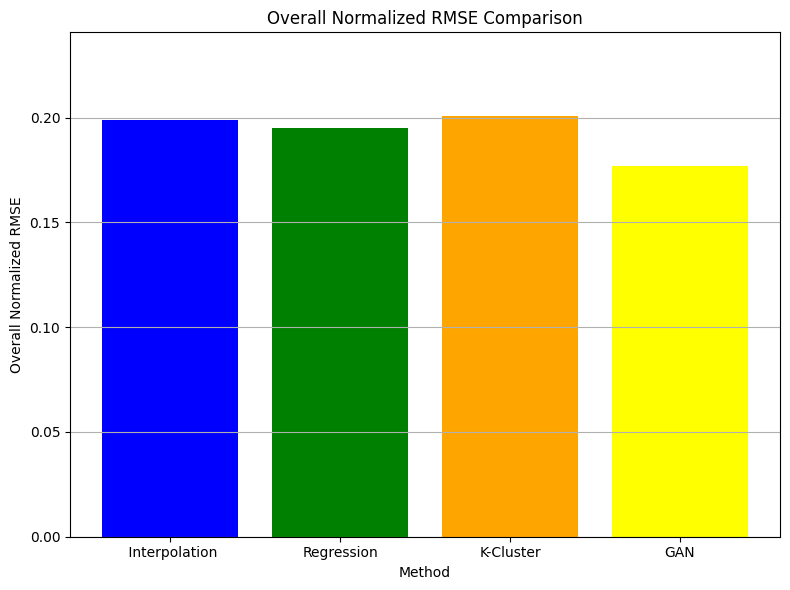

In [ ]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt

# Load the complete dataset
complete_data_imputed = pd.read_csv('data01.csv')

# Fill missing values with linear interpolation
filled_data_linear = complete_data_imputed.interpolate(method='linear', axis=0)

# Perform multiple imputation using IterativeImputer
mice_imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_data_mice = mice_imputer.fit_transform(complete_data_imputed)

# Convert the imputed array back to a DataFrame
imputed_df_mice = pd.DataFrame(imputed_data_mice, columns=complete_data_imputed.columns)

# Fill missing values with forward fill
filled_data_forward = complete_data_imputed.fillna(method='ffill')

# Calculate overall normalized RMSE for linear interpolation
overall_normalized_rmse_linear = np.mean([
    (np.sqrt(np.mean((filled_data_linear[col].values - filled_data_linear[col].mean()) ** 2))) /
    (np.max(filled_data_linear[col].values) - np.min(filled_data_linear[col].values))
    for col in filled_data_linear.columns])

# Calculate overall normalized RMSE for multiple imputation using IterativeImputer
overall_normalized_rmse_mice = np.mean([
    (np.sqrt(np.mean((imputed_df_mice[col].values - imputed_df_mice[col].mean()) ** 2))) /
    (np.max(imputed_df_mice[col].values) - np.min(imputed_df_mice[col].values))
    for col in imputed_df_mice.columns])

# Calculate overall normalized RMSE for forward fill
overall_normalized_rmse_forward = np.mean([
    (np.sqrt(np.mean((filled_data_forward[col].values - filled_data_forward[col].mean()) ** 2))) /
    (np.max(filled_data_forward[col].values) - np.min(filled_data_forward[col].values))
    for col in filled_data_forward.columns])

# Plotting
plt.figure(figsize=(8, 6))

# Plot overall normalized RMSE values
plt.bar([' Interpolation', 'Regression', 'K-Cluster','GAN'],
        [overall_normalized_rmse_linear, overall_normalized_rmse_mice, overall_normalized_rmse_forward,overall_normalized_rmse_gan],
        color=['blue', 'green', 'orange','yellow'])

# Customizing plot
plt.title('Overall Normalized RMSE Comparison')
plt.xlabel('Method')
plt.ylabel('Overall Normalized RMSE')
plt.ylim(0, max(overall_normalized_rmse_linear, overall_normalized_rmse_mice, overall_normalized_rmse_forward,overall_normalized_rmse_gan) * 1.2)
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()
